In [66]:
import warnings

In [67]:
warnings.filterwarnings("ignore")

In [68]:
import pandas as pd

In [69]:
data=pd.read_csv(r'C:\Users\deyar\OneDrive\Desktop\MarketingCampaignClustring\notebooks\data\Online Retail (1).csv',encoding='ISO-8859-1')

In [70]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [71]:
data['total_bill']=data['Quantity']*data['UnitPrice']

In [72]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34


In [73]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
total_bill          0
dtype: int64

In [74]:
data.dropna(inplace=True)

In [75]:
data.drop_duplicates(inplace=True)

In [76]:
data.shape

(401604, 9)

In [77]:
d1=data.groupby('CustomerID').agg({'InvoiceNo':'count',
                                  'Quantity':'sum',
                                   'total_bill':'sum'})

In [78]:
d1.columns=['invoice_frequency','total_quantity','total_bill']

In [79]:
d1.head()

,invoice_frequency,total_quantity,total_bill
CustomerID,,,
12346.0,2,0,0.00
12347.0,182,2458,4310.00
12348.0,31,2341,1797.24
12349.0,73,631,1757.55
12350.0,17,197,334.40


In [80]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [81]:
latest_date=data['InvoiceDate'].max()

In [82]:
data['day_gap']=(latest_date-data['InvoiceDate'])

In [83]:
d2=data.groupby('CustomerID')['day_gap'].min().reset_index()

In [84]:
d2['day_gap']=d2['day_gap'].dt.days

In [85]:
d12=pd.merge(d1,d2,on='CustomerID',how='inner')

In [86]:
d12.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap
0,12346.0,2,0,0.00,325
1,12347.0,182,2458,4310.00,1
2,12348.0,31,2341,1797.24,74
3,12349.0,73,631,1757.55,18
4,12350.0,17,197,334.40,309


In [87]:
d3=data.groupby('CustomerID')['Country'].unique().reset_index()

In [88]:
d3.head()

,CustomerID,Country
0,12346.0,[United Kingdom]
1,12347.0,[Iceland]
2,12348.0,[Finland]
3,12349.0,[Italy]
4,12350.0,[Norway]


In [89]:
x=list(d3['Country'].values)

In [90]:
m=[]
for i in range(len(x)):
   c=str(x[i][0])
   m.append(c)

In [91]:
d3['country']=m

In [92]:
d3.drop('Country',axis=1,inplace=True)

In [93]:
df1=pd.merge(d12,d3,on='CustomerID',how='inner')
df1.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country
0,12346.0,2,0,0.00,325,United Kingdom
1,12347.0,182,2458,4310.00,1,Iceland
2,12348.0,31,2341,1797.24,74,Finland
3,12349.0,73,631,1757.55,18,Italy
4,12350.0,17,197,334.40,309,Norway


In [94]:
df=df1.copy()

In [95]:
from sklearn.preprocessing import OrdinalEncoder
c=list(pd.unique(df['country']))
o=OrdinalEncoder(categories=[c])
df['country_code']=o.fit_transform(df[['country']])


In [96]:
df.drop('country',axis=1,inplace=True)

In [97]:
df_clean=df.drop(['CustomerID','country_code','total_quantity'],axis=1)

In [98]:
df_clean.head()

,invoice_frequency,total_bill,day_gap
0,2,0.00,325
1,182,4310.00,1
2,31,1797.24,74
3,73,1757.55,18
4,17,334.40,309


In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.metrics import silhouette_score

In [100]:
df_final=df_clean[df_clean['total_bill']>0]

In [101]:
m=MinMaxScaler()
v=m.fit_transform(df_final)
d_sc=pd.DataFrame(v,columns=df_clean.columns)
d_sc.head()

,invoice_frequency,total_bill,day_gap
0,0.023172,0.015421,0.002681
1,0.003841,0.006430,0.198391
2,0.009218,0.006288,0.048257
3,0.002048,0.001196,0.828418
4,0.012034,0.005529,0.093834


In [102]:
import optuna

In [103]:
def objective(trial):
    n_clusters=trial.suggest_int('n_clusters',3,6)
    max_iter=trial.suggest_int('max_iter',1000,5000)
    model=KMeans(n_clusters=n_clusters,max_iter=max_iter)
    model.fit(d_sc)
    silhouette = silhouette_score(d_sc,model.labels_)
    return silhouette

In [104]:
study=optuna.create_study(direction='maximize')

[I 2024-05-13 19:19:39,155] A new study created in memory with name: no-name-63597a4e-d47b-4864-aec1-00d011b69d8a


In [105]:
study.optimize(objective,n_trials=25)

[I 2024-05-13 19:19:39,435] Trial 0 finished with value: 0.6562835443433934 and parameters: {'n_clusters': 3, 'max_iter': 4567}. Best is trial 0 with value: 0.6562835443433934.
[I 2024-05-13 19:19:39,680] Trial 1 finished with value: 0.5795564109721711 and parameters: {'n_clusters': 4, 'max_iter': 4458}. Best is trial 0 with value: 0.6562835443433934.
[I 2024-05-13 19:19:39,936] Trial 2 finished with value: 0.5795564109721711 and parameters: {'n_clusters': 4, 'max_iter': 3855}. Best is trial 0 with value: 0.6562835443433934.
[I 2024-05-13 19:19:40,199] Trial 3 finished with value: 0.5795564109721711 and parameters: {'n_clusters': 4, 'max_iter': 3730}. Best is trial 0 with value: 0.6562835443433934.
[I 2024-05-13 19:19:40,456] Trial 4 finished with value: 0.5799820691290235 and parameters: {'n_clusters': 4, 'max_iter': 4106}. Best is trial 0 with value: 0.6562835443433934.
[I 2024-05-13 19:19:40,728] Trial 5 finished with value: 0.6562835443433934 and parameters: {'n_clusters': 3, 'max_

In [106]:
study.best_params

{'n_clusters': 3, 'max_iter': 1051}

In [107]:
study.best_value

0.6573502204378671

In [108]:
k=KMeans(n_clusters=3,max_iter=3419)

In [109]:
label=k.fit_predict(d_sc)

In [110]:
df_final['label']=label

In [111]:
df_final['label'].value_counts()

label
0    2911
2     804
1     607
Name: count, dtype: int64

In [112]:
import seaborn as sn
import matplotlib.pyplot as pl

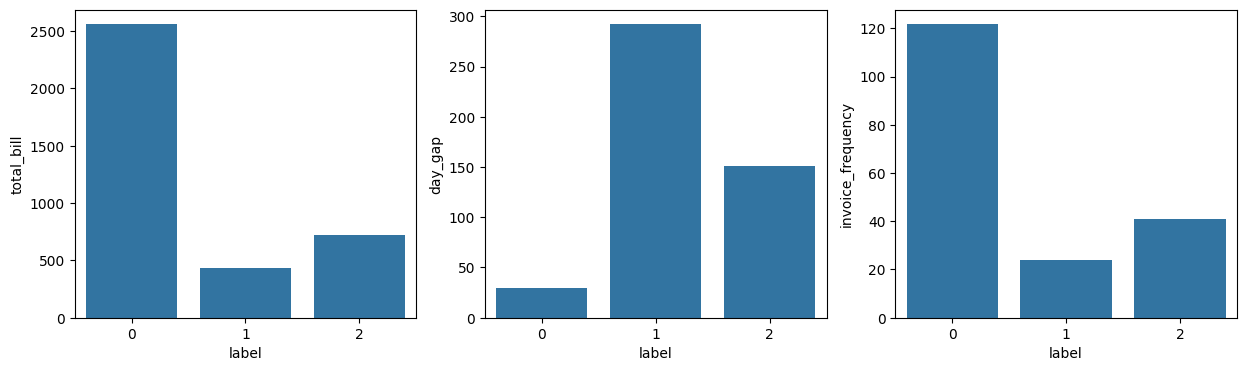

In [113]:
pl.figure(figsize=(15,4))
pl.subplot(1,3,1)
sn.barplot(data=df_final,x='label',y='total_bill',ci=False)
pl.subplot(1,3,2)
sn.barplot(data=df_final,x='label',y='day_gap',ci=False)
pl.subplot(1,3,3)
sn.barplot(data=df_final,x='label',y='invoice_frequency',ci=False)
pl.show()

 1.cluster 0= high total_bill,low day_gap or active user.

 2.cluster 2=medium total_bill,medium day_gap,user may active or not.

3.cluster 1=very low total_bill,high day_gap or user is not active.

In [114]:
model_data=df1[df1['total_bill']>0]

In [115]:
model_data.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country
1,12347.0,182,2458,4310.00,1,Iceland
2,12348.0,31,2341,1797.24,74,Finland
3,12349.0,73,631,1757.55,18,Italy
4,12350.0,17,197,334.40,309,Norway
5,12352.0,95,470,1545.41,35,Norway


In [116]:
model_data['category']=label

In [117]:
model_data.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country,category
1,12347.0,182,2458,4310.00,1,Iceland,0
2,12348.0,31,2341,1797.24,74,Finland,0
3,12349.0,73,631,1757.55,18,Italy,0
4,12350.0,17,197,334.40,309,Norway,1
5,12352.0,95,470,1545.41,35,Norway,0


In [118]:
import os

In [119]:
model_path=os.path.join("data","model.csv")

In [120]:
model_data.to_csv(model_path,index=False) 

In [121]:
df.head()

,CustomerID,invoice_frequency,total_quantity,total_bill,day_gap,country_code
0,12346.0,2,0,0.00,325,0.0
1,12347.0,182,2458,4310.00,1,1.0
2,12348.0,31,2341,1797.24,74,2.0
3,12349.0,73,631,1757.55,18,3.0
4,12350.0,17,197,334.40,309,4.0


In [122]:
df=df[df['total_bill']>0]

In [123]:
df.drop('CustomerID',axis=1,inplace=True)

In [124]:
df.head()

,invoice_frequency,total_quantity,total_bill,day_gap,country_code
1,182,2458,4310.00,1,1.0
2,31,2341,1797.24,74,2.0
3,73,631,1757.55,18,3.0
4,17,197,334.40,309,4.0
5,95,470,1545.41,35,4.0


In [125]:
from sklearn.decomposition import PCA,ts

In [137]:
from sklearn.manifold import TSNE

In [138]:
p=TSNE(n_components=2)

In [139]:
c=p.fit_transform(df)

In [140]:
z=pd.DataFrame(c,columns=['pca1','pca2'])

In [141]:
z.head()

,pca1,pca2
0,50.984032,25.022003
1,51.933964,-15.924534
2,37.593723,-31.677191
3,-42.178413,25.258261
4,36.993271,-22.968731


In [142]:
z['label']=label

In [143]:
z.head()

,pca1,pca2,label
0,50.984032,25.022003,0
1,51.933964,-15.924534,0
2,37.593723,-31.677191,0
3,-42.178413,25.258261,1
4,36.993271,-22.968731,0


In [132]:
import seaborn as sn
import matplotlib.pyplot as pl

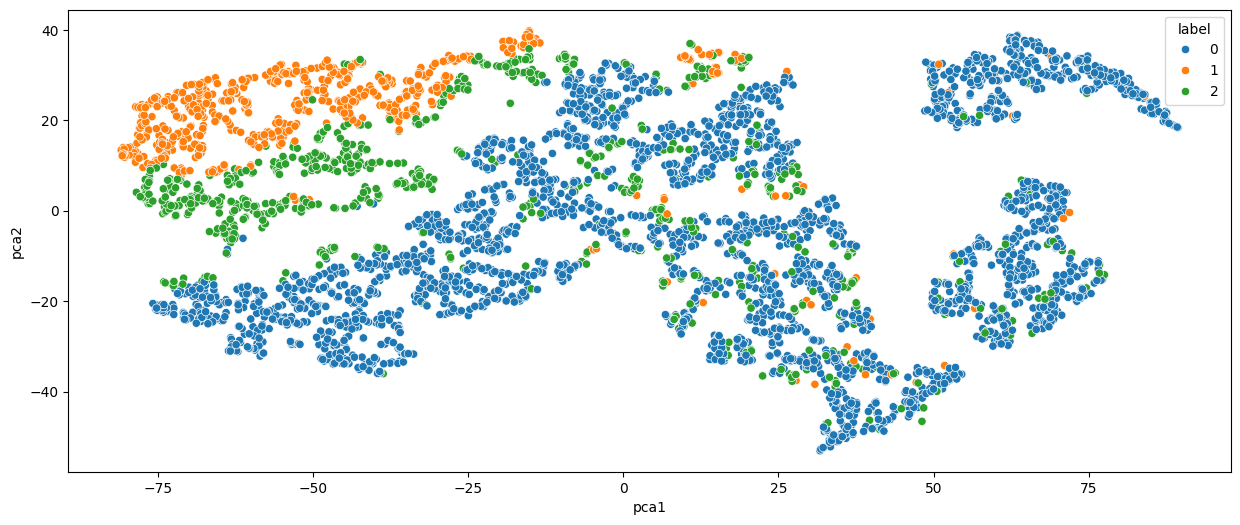

In [147]:
pl.figure(figsize=(15,6))
sn.scatterplot(data=z,x='pca1',y='pca2',hue='label',palette='tab10')
pl.show()